In [35]:
# For data manipulation 
import pandas as pd

# Basic plotting
import matplotlib.pyplot as plt

# For more advanced visualizations
import seaborn as sns


In [36]:
# Load your data files
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')

# Remove rows with merge conflict markers
pollen_df = pollen_df[~pollen_df['Farm'].str.contains('>>>>>>>', na=False)]
visit_df = visit_df[~visit_df['Farm'].str.contains('>>>>>>>', na=False)]

# Check column names first
print("Pollen DataFrame columns:", pollen_df.columns.tolist())
print("Visit DataFrame columns:", visit_df.columns.tolist())

# Merge the DataFrames on Species, which will create _x and _y suffixes for other columns
# Rename Species columns before merge to be explicit
merged_df = pd.merge(pollen_df.rename(columns={'Species': 'Species_flower'}), 
					 visit_df.rename(columns={'Species': 'Species_bee'}), 
					 left_on='Farm', right_on='Farm', how='inner')

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Group by bee species and calculate average pollen load
avg_pollen = merged_df.groupby('Species_bee')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Pollen DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Species_bee
Andrena nitidiuscula           0.879039
Hylaeus hyalinatus             0.879039
Osmia spinulosa                0.782072
Megachile ligniseca            0.720092
Osmia leaiana                  0.719084
                                 ...   
Lasioglossum smeathmanellum    0.508929
Osmia caerulescens             0.508929
Panurgus calcaratus            0.508929
Sphecodes puncticeps           0.508929
Species                             NaN
Name: Load, Length: 86, dtype: float64


In [37]:
def safe_merge_and_analyze():
    """Safely load, merge, and analyze data"""
        
    try:
        # Load data
        pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
        visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')
        
        print("✓ Data loaded successfully")
        print(f"Pollen shape: {pollen_df.shape}")
        print(f"Visit shape: {visit_df.shape}")
        
        # Show column names
        print("\nColumn names:")
        print(f"Pollen: {pollen_df.columns.tolist()}")
        print(f"Visit: {visit_df.columns.tolist()}")
        
        # Find common columns for merging
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns for merging: {list(common_cols)}")
        
        if len(common_cols) > 0:
            # Use first common column for merging
            merge_col = list(common_cols)[0]
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            
            print(f"✓ Merged on '{merge_col}'")
            print(f"Merged shape: {merged_df.shape}")
            print(f"Merged columns: {merged_df.columns.tolist()}")
            
            # Look for appropriate columns to analyze
            numeric_cols = merged_df.select_dtypes(include=['number']).columns
            categorical_cols = merged_df.select_dtypes(include=['object']).columns
            
            print(f"\nNumeric columns: {numeric_cols.tolist()}")
            print(f"Categorical columns: {categorical_cols.tolist()}")
            
            return merged_df
        else:
            print("No common columns found for merging")
            return None
            
    except Exception as e:
        print(f"Error: {e}")
        return None

# Use the safe function
merged_df = safe_merge_and_analyze()

# If merge was successful, try the analysis
if merged_df is not None:
    # Convert Load to numeric
    merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')
    avg_pollen = merged_df.groupby('Species_y')['Load'].mean().sort_values(ascending=False)
    print("Use Species_y and Load to create my analysis")

✓ Data loaded successfully
Pollen shape: (3523, 11)
Visit shape: (2467, 11)

Column names:
Pollen: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Common columns for merging: ['Round', 'Species', 'Date', 'Type', 'Status', 'Farm']
✓ Merged on 'Round'
Merged shape: (2352717, 21)
Merged columns: ['Farm_x', 'Type_x', 'Round', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']

Numeric columns: []
Categorical columns: ['Farm_x', 'Type_x', 'Round', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Use Species_y an

In [38]:
# Remove rows with merge conflict markers (using Farm_x since that's the actual column name after merge)
merged_df = merged_df[~merged_df['Farm_x'].str.contains('>>>>>>>', na=False)]

# Load is already numeric from the merge, but ensure it stays that way
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

In [39]:
# Check the actual column names in your merged DataFrame
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

Available columns in merged_df:
['Farm_x', 'Type_x', 'Round', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']


1. Bar Chart: Average Pollen Load by Flower Species 

Purpose: Shows which flower species provide the most pollen to visiting bees. This visualization compares the average amount of pollen collected from each flower species by bees. It helps identify which flowers are most valuable for pollen collection. 

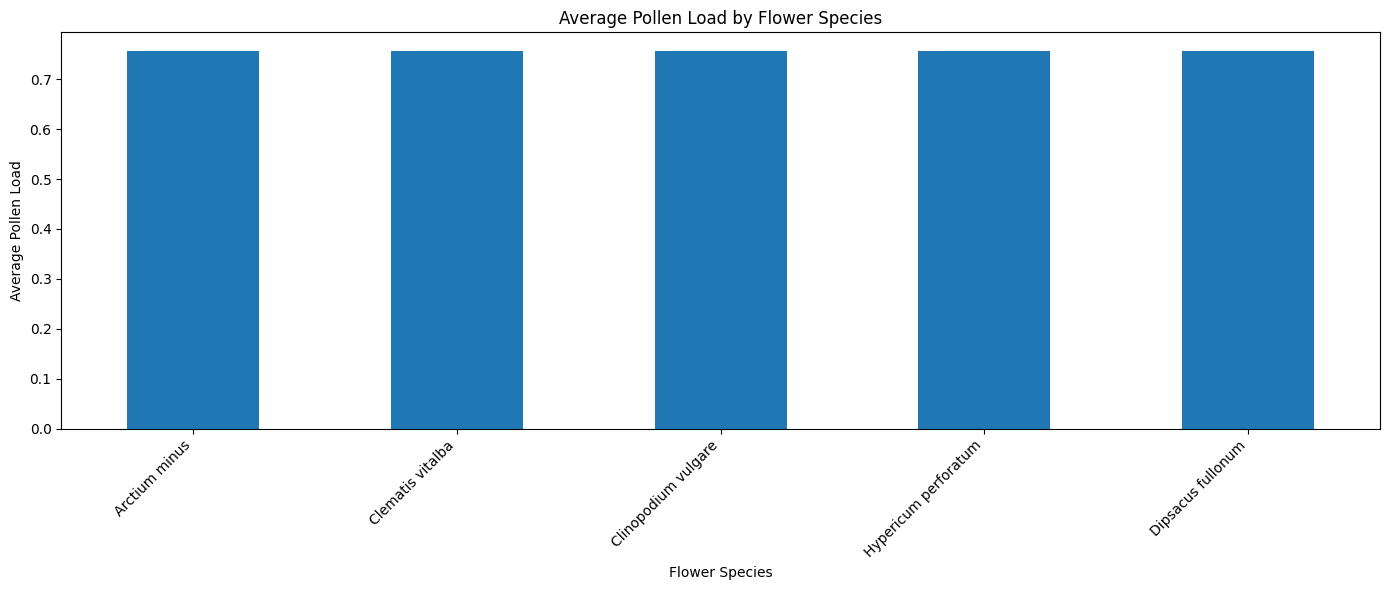

In [58]:
# Show the top 5 flower species with highest average pollen loads

# Calculate average pollen load by flower species
avg_pollen_by_flower = merged_df.groupby('Visiting')['Load'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(14, 6))
avg_pollen_by_flower.head(5).plot(kind='bar')
plt.title('Average Pollen Load by Flower Species')
plt.xlabel('Flower Species')
plt.ylabel('Average Pollen Load')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Story: This chart reveals which flowers are more valuable to bees for pollen collection, informing conservation and planting strategies. 

The chart reveals that certain flower species yield higher average pollen loads, suggesting these flowers are particularly important for bee nutrition and may be prioritized in conservation efforts. 

2. Box Plot: Distribution of Pollen Load by Bee Species

Purpose: Compares pollen load variability accross different bee species. The visualization displays the spread and variability of pollen loads collected by different bee species, highlighting differences in their foraging efficiency.

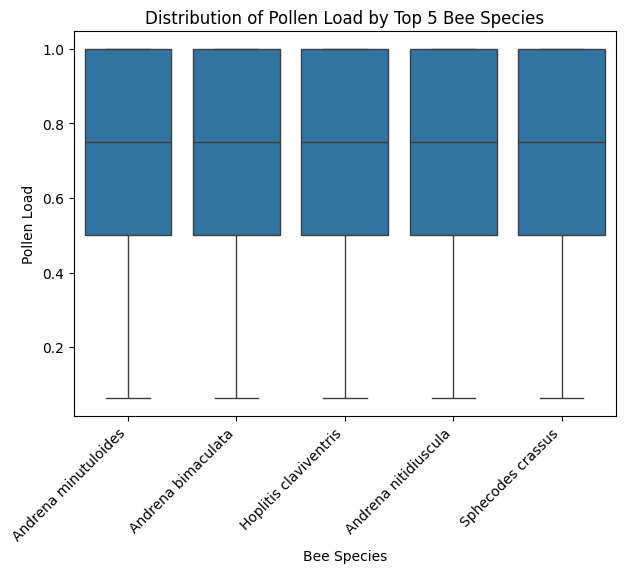

In [52]:
# Get top 5 species by average pollen load
top_5_species = avg_pollen.head(5).index.tolist()
top_5_df = merged_df[merged_df['Species_y'].isin(top_5_species)]

sns.boxplot(x='Species_y', y='Load', data=top_5_df)
plt.title('Distribution of Pollen Load by Top 5 Bee Species') 
plt.xlabel('Bee Species')
plt.ylabel('Pollen Load')
plt.tight_layout() 
plt.xticks(rotation=45, ha='right')
plt.show()

Story: Some bee species consistently collect more pollen, while others show greater variability, suggesting differences in foraging behavior or effectiveness. 

If one species consistently collects more pollen, it may be especially effective or adapted to certain flowers. Wide variability in other species could indicate differences in individual foraging strategies. 

3. Scatter Plot: Visiting Frequency vs. Pollen Load

Purpose: Examines the relationship between how often a bee visits flowers and the amount of pollen it collects. It can indicate whether more frequent visits correlate with greater pollen collection.

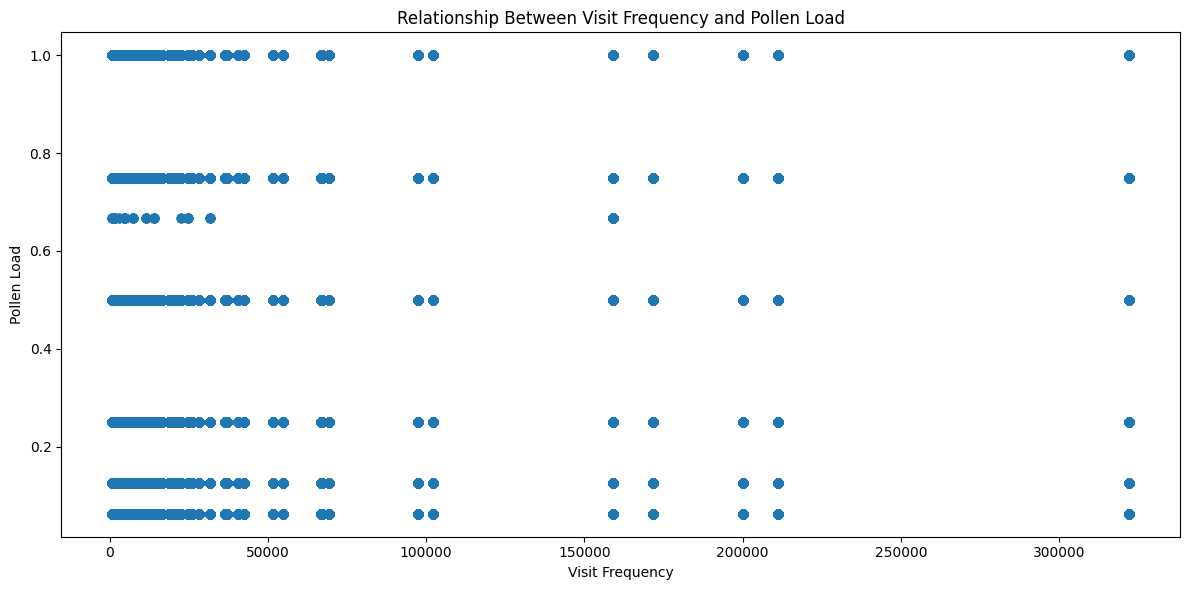

In [60]:
# Remove rows with NaN values in Visiting or Load columns
plot_df = merged_df.dropna(subset=['Visiting', 'Load'])

# Create visit frequency counts
visit_frequency = plot_df.groupby('Visiting').size()
plot_df = plot_df.merge(visit_frequency.rename('visit_frequency'), left_on='Visiting', right_index=True)

plt.figure(figsize=(12, 6))
plt.scatter(plot_df['visit_frequency'], plot_df['Load'], alpha=0.6)
plt.title('Relationship Between Visit Frequency and Pollen Load')
plt.xlabel('Visit Frequency')
plt.ylabel('Pollen Load')
plt.tight_layout()
plt.show()

Story: Identifies whether frequent visits are associated with higher pollen loads, highlighting the efficiency of bee foraging patterns. 

The scatter plot shows a positive correlation, it suggests that bees who visit flowers more often are also collecting more pollen, highlighting the link between activity level and foraging success. 

4. Stacked Bar Chart: Number of Visits per Flower Species by Bee Species 

Purpose: Illustrates which bee species visit which flowers most often. This chart visualizes how many times each bee species visits each flower species. Each bar represents a flower species, and segments within the bar show the contibution of each bee species to the total number of visits. This helps illustrate visitation preferences and possible specialization or overlap amoung bee species.

Top 5 flower species by total visits:
Visiting
Heracleum sphondylium        322064
Tripleurospermum inodorum    211292
Leucanthemum vulgare         199948
Centaurea nigra              171700
Taraxacum agg.               159052
dtype: int64


C:\Users\schne\AppData\Local\Temp\ipykernel_1744\1210604232.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

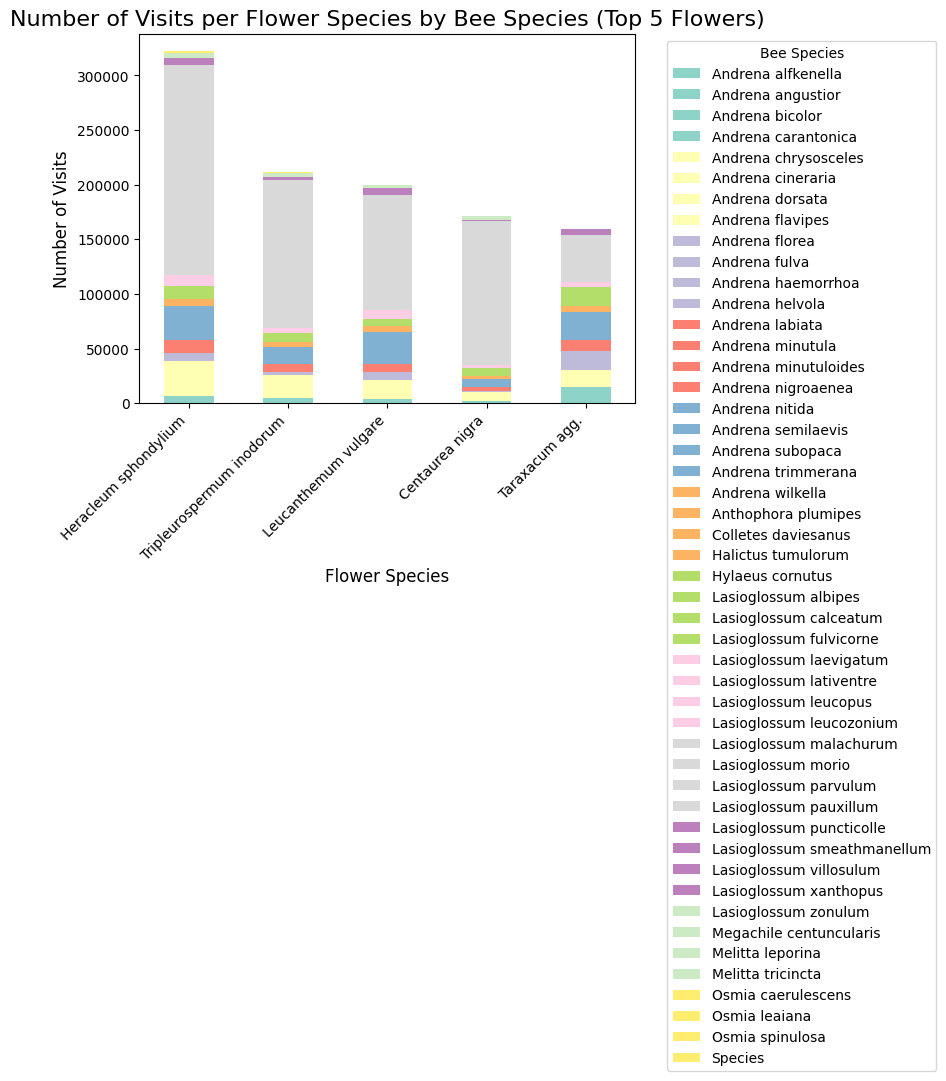


Visit counts table:
Species_x                  Andrena alfkenella  Andrena angustior  \
Visiting                                                           
Heracleum sphondylium                    2184                544   
Tripleurospermum inodorum                1792                224   
Leucanthemum vulgare                      112                624   
Centaurea nigra                           448                 16   
Taraxacum agg.                              0                400   

Species_x                  Andrena bicolor  Andrena carantonica  \
Visiting                                                          
Heracleum sphondylium                 2380                 1888   
Tripleurospermum inodorum             1616                  936   
Leucanthemum vulgare                  1224                 1840   
Centaurea nigra                        960                  432   
Taraxacum agg.                        5456                 8568   

Species_x                  Andre

In [68]:
# Show the top 5 flower species with number of visits by bee species

# Check if required columns exist
required_cols = ['Visiting', 'Species_x']
if all(col in merged_df.columns for col in required_cols):
    
    # Calculate visit counts by flower species and bee species
    visit_counts = merged_df.groupby(['Visiting', 'Species_x']).size().unstack(fill_value=0)
    
    # Get top 5 flower species by total visits
    total_visits_per_flower = visit_counts.sum(axis=1).sort_values(ascending=False)
    top_5_flowers = total_visits_per_flower.head(5).index
    
    print("Top 5 flower species by total visits:")
    print(total_visits_per_flower.head(5))
    
    # Filter data to show only top 5 flowers
    visit_counts_top5 = visit_counts.loc[top_5_flowers]
    
    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    ax = visit_counts_top5.plot(kind='bar', stacked=True, colormap='Set3')
    
    plt.title('Number of Visits per Flower Species by Bee Species (Top 5 Flowers)', fontsize=16)
    plt.xlabel('Flower Species', fontsize=12)
    plt.ylabel('Number of Visits', fontsize=12)
    plt.legend(title='Bee Species', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Display the data table
    print("\nVisit counts table:")
    print(visit_counts_top5)
    
else:
    print(f"Required columns not found: {required_cols}")
    print(f"Available columns: {merged_df.columns.tolist()}")

Story: Highlights bee-flower interaction networks, showing preferences and resource partioning amoung species. This visualization reveals which bee species are the primary visitors to each flower species and highlights shared or exculsive relationships. For example, if a certain flower's bar is mostly one color, it indicates visitation by a dominant bee species, a mix of colors suggests shared use among species. 